In [1]:
import import_ipynb
import torch 
from torch import nn
import ddl

importing Jupyter notebook from ddl.ipynb


In [5]:
class AlexNet(ddl.Classifier):
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(96, kernel_size=11, stride=4, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2),

            nn.LazyConv2d(384, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.LazyConv2d(384, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.LazyConv2d(256, kernel_size=3, padding=1),
            nn.ReLU(),

            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Flatten(),

            nn.LazyLinear(4096),
            nn.ReLU(),
            nn.Dropout(p=0.5),

            nn.LazyLinear(4096),
            nn.ReLU(),
            nn.Dropout(p=0.5),

            nn.LazyLinear(num_classes)
        )
        self.net.apply(ddl.init_cnn)

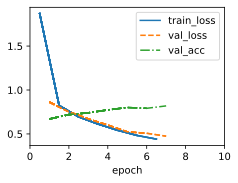

In [8]:
model = AlexNet(lr = 0.01)
data = ddl.FashionMNIST(batch_size=128, resize=(224,224))
trainer = ddl.Trainer(max_epochs=10, num_gpus=1)
trainer.fit(model, data)

In [ ]:
from d2l import torch as d2l
model = AlexNet(lr = 0.01)
data = ddl.FashionMNIST(batch_size=128, resize=(224,224))
trainer = ddl.Trainer(max_epochs=10, num_gpus=1)
trainer.fit(model, data)